# INSAID-Fraud-Detection-Model-for-Financial-Transactions

Expectations: Your task is to execute the process for proactive detection of fraud while answering the following questions.

1. Data cleaning including missing values, outliers, and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model
4. Demonstrate the performance of the model by using the best set of tools.
5. What are the key factors that predict fraudulent customers
6. Do these factors make sense? If yes, How? If not, How not
7. What kind of prevention should be adopted while the company updates its infrastructure
8. Assuming these actions have been implemented, how would you determine if they work

This case requires trainees to develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 10 columns. 

Candidates can use whatever method they wish to develop their machine learning model. Following usual model development procedures, the model would be estimated on the calibration data and tested on the validation data. This case requires both statistical analysis and creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the results of your machine learning model.

# Data Preprocessing

Reading data from .csv (Comma Separated Value) file into DataFrame using pandas 

In [1]:
import pandas as pd
import numpy as np
import os

# Define the folder path and file name
Folder_path = r"C:\Users\Lenovo\INSAID-Fraud-Detection-Model-for-Financial-Transactions"
file_name = "Fraud.csv"

# Combine the folder path and file name into a full file path
full_path = os.path.join(Folder_path, file_name)

def Reading_file(full_path):
    # Check if the file exists
    if os.path.exists(full_path):
        print("File Exists")  
        print("Reading file into dataframe...")    
        # Read the file into a DataFrame
        df = pd.read_csv(full_path)   
        return df
        # Display the first few rows of the DataFrame
    else:
        print('File doesn\'t exist')
df = Reading_file(full_path)

File Exists
Reading file into dataframe...


Check the numerical and categorical features and find the missing values in DataFrame.

In [2]:
Column_Name = df.columns
print("Column Name in the fraud.csv file, Total Column : ",len(Column_Name))
#print(Column_Name)

# Identify numerical features
numerical_features = df.select_dtypes(include=['int', 'float']).columns
num_numerical_features = len(numerical_features)
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns
num_categorical_features = len(categorical_features)

print("Number of numerical features:", num_numerical_features)
#print("Numerical Feature Column Name: ",numerical_features)
print("Number of categorical features:", num_categorical_features)
#print("categorical Feature Column Name: ",categorical_features)
#Find the number of missing values in Pandas
#NaN (Not a Number) and None are treated as missing values in Pandas.
#print(df.isna().sum())

# Check for null values
df.isnull().values.any()
# Getting information about data
df.info()

Column Name in the fraud.csv file, Total Column :  11
Number of numerical features: 8
Number of categorical features: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Analysis

This is a really big dataset with no NULL values, having the size of over 500MB. This would take some time to train for a normal GPU. There are a total number of  11, in which there are a total of 8 number of numerical feature columns total 3 categorical features in the dataset. 

In [3]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


These results prove that this is a highly unbalanced data as Percentage of Legit transactions= 99.87 % and Percentage of Fraud transactions= 0.13 %. 
So, DECISION TREES AND RANDOM FORESTS are good methods for imbalanced data.

In [4]:
# Merchants
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


For merchants there is no information regarding the attribites oldbalanceDest and newbalanceDest. 

In [5]:
# Analysis of data of Column 'type' in the data frame
# Here, the Categorical column type of transaction is important Whereas other Categorical columns
# like 'nameOrig', 'nameDest' Don't contain any significance towards the model training, analysis, prediction
unique_values = df['type'].unique()
print("Unique Value in Column type is ",unique_values)

# There are 5 unique values in the column 'type'.
# Count of fraud and non-fraud cases in the various types of transaction 
type_of_trans = ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']
# Count fraud and non-fraud cases for each transaction type
fraud_counts = df[df['isFraud'] == 1].groupby('type').size().reindex(type_of_trans, fill_value=0)
non_fraud_counts = df[df['isFraud'] == 0].groupby('type').size().reindex(type_of_trans, fill_value=0)
# Create a summary DataFrame
summary_df = pd.DataFrame({'Transaction Type': type_of_trans,'Fraud Cases': fraud_counts.values,'Non-Fraud Cases': non_fraud_counts.values})
print("Count of Fraud and Non-Fraud Cases by Transaction Type:")
print(summary_df)

Unique Value in Column type is  ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Count of Fraud and Non-Fraud Cases by Transaction Type:
  Transaction Type  Fraud Cases  Non-Fraud Cases
0          PAYMENT            0          2151495
1         TRANSFER         4097           528812
2         CASH_OUT         4116          2233384
3            DEBIT            0            41432
4          CASH_IN            0          1399284


Here is some interesting insight from the data of column 'type': Transaction types TRANSFER, CASH_OUT are most prone to fraud. Other types of transactions, 'PAYMENT', 'DEBIT', and 'CASH_IN', don't have any fraud cases reported.

Plotting histogram to further analysis of fraud case in TRANSFER, CASH_OUT, Also finding min, max, and mean of amount column that is fraud in TRANSFER, CASH_OUT


TRANSFER Fraud Cases:
Min Amount: 63.8, Max Amount: 10000000.0, Mean Amount: 1480891.6729338542

CASH_OUT Fraud Cases:
Min Amount: 0.0, Max Amount: 10000000.0, Mean Amount: 1455102.5859645286


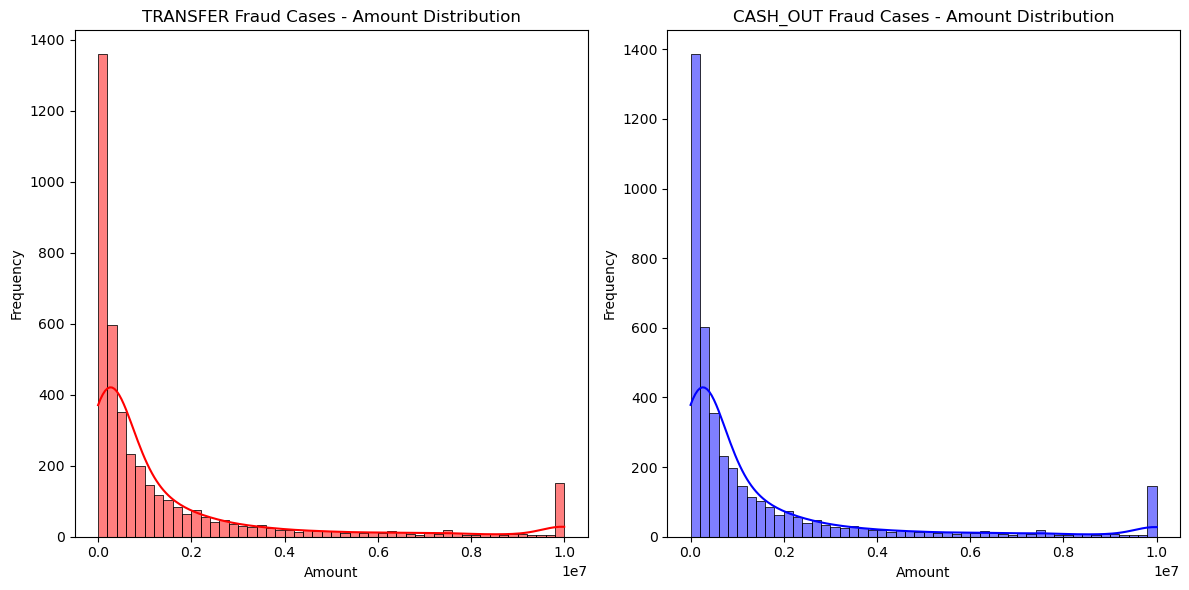

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def Amount_dis(df):
    # Filter fraud cases for TRANSFER and CASH_OUT
    fraud_transfer = df[(df['isFraud'] == 1) & (df['type'] == 'TRANSFER')]
    fraud_cash_out = df[(df['isFraud'] == 1) & (df['type'] == 'CASH_OUT')]
    
    # Calculate min, max, and mean for TRANSFER fraud cases
    transfer_min = fraud_transfer['amount'].min()
    transfer_max = fraud_transfer['amount'].max()
    transfer_mean = fraud_transfer['amount'].mean()
    
    # Calculate min, max, and mean for CASH_OUT fraud cases
    cash_out_min = fraud_cash_out['amount'].min()
    cash_out_max = fraud_cash_out['amount'].max()
    cash_out_mean = fraud_cash_out['amount'].mean()
    
    print("TRANSFER Fraud Cases:")
    print(f"Min Amount: {transfer_min}, Max Amount: {transfer_max}, Mean Amount: {transfer_mean}")
    
    print("\nCASH_OUT Fraud Cases:")
    print(f"Min Amount: {cash_out_min}, Max Amount: {cash_out_max}, Mean Amount: {cash_out_mean}")
    
    # Plot histograms separately
    plt.figure(figsize=(12, 6))
    
    # Histogram for TRANSFER fraud cases
    plt.subplot(1, 2, 1)
    sns.histplot(fraud_transfer['amount'], bins=50, color='red', kde=True)
    plt.title('TRANSFER Fraud Cases - Amount Distribution')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    
    # Histogram for CASH_OUT fraud cases
    plt.subplot(1, 2, 2)
    sns.histplot(fraud_cash_out['amount'], bins=50, color='blue', kde=True)
    plt.title('CASH_OUT Fraud Cases - Amount Distribution')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
Amount_dis(df)

## VISUALISATION: CORRELATION HEATMAP

<Axes: >

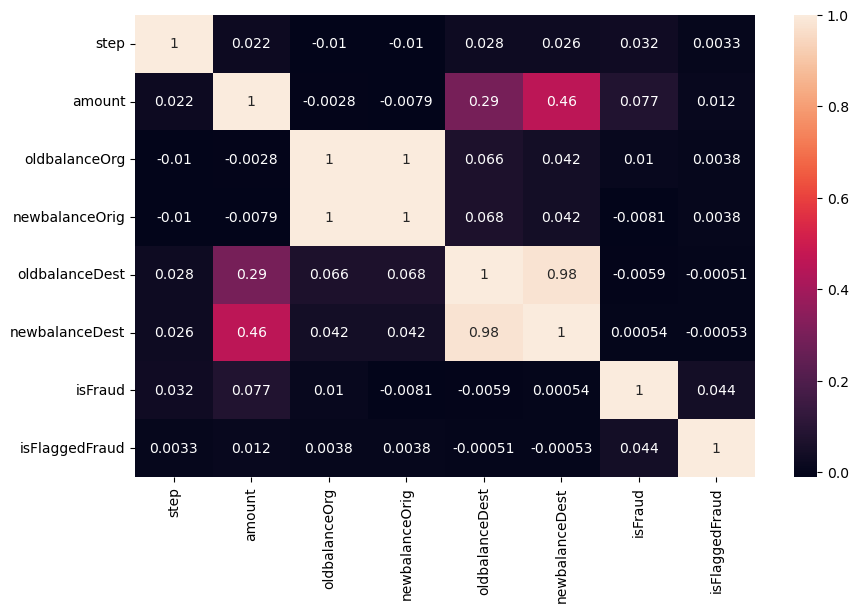

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Correlation between the numnerical column only 
corr=df[df.select_dtypes(include=['int', 'float']).columns].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

#### NUMBER OF LEGIT AND FRAUD TRANSACTIONS

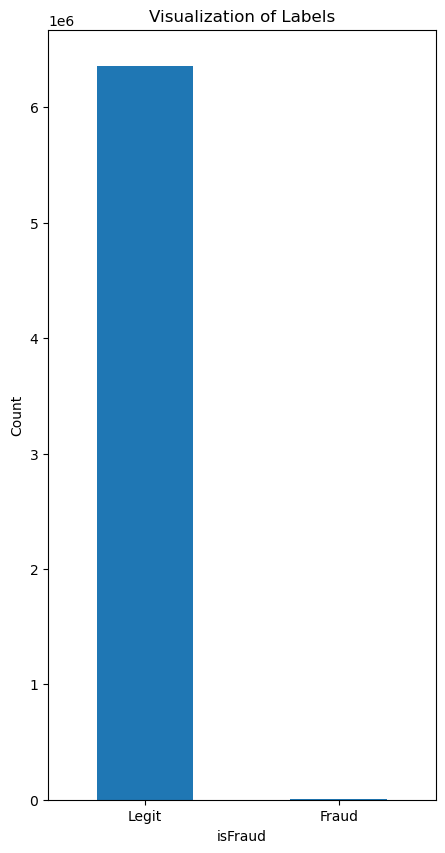

In [8]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

## PROBLEM SOLVING

In [9]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### LABEL ENCODING

In [10]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


THERE ARE 3 ATTRIBUTES WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY.

In [11]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [12]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


#### MULTICOLINEARITY

In [13]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

Thus combine these pairs of collinear attributes and drop the individual ones.

In [14]:
# Feature Engineering: Creating a feature with existing features that are highly related to each other.
# In this case taking Actual_amount_orig = df['oldbalanceOrg'] - df['newbalanceOrig'], Actual_amount_dest = df['oldbalanceDest'] - df['newbalanceDest']
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<Axes: >

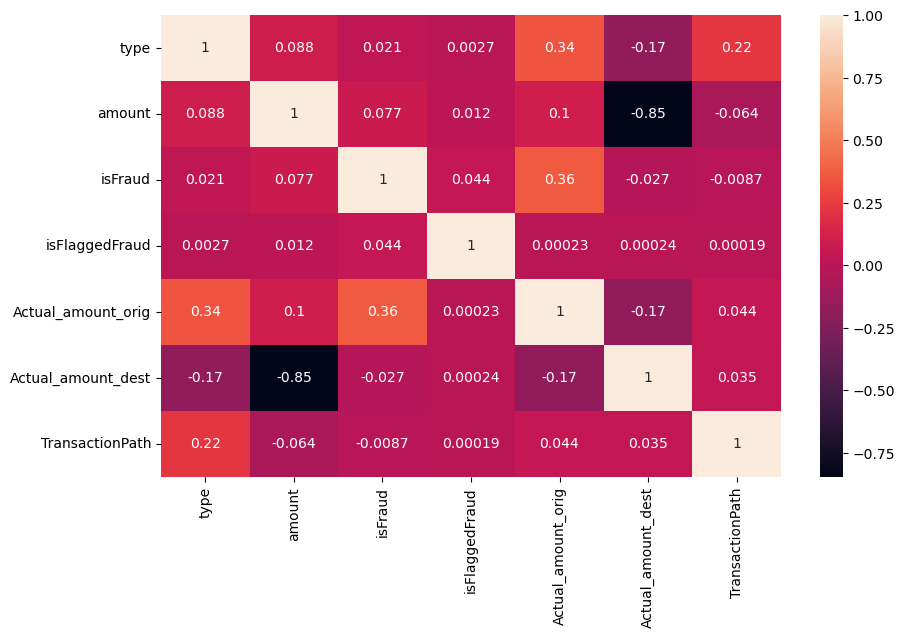

In [15]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

<br>How did you select variables to be included in the model?
<br>Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the isFraud Attribute.

## MODEL BUILDING

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#### NORMALIZING (SCALING) AMOUNT

In [17]:
# Perform Scaling
# scaler = StandardScaler()
# new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
# new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

I did not normalize the complete dataset because it may lead to decrease in accuracy of model.

#### TRAIN-TEST SPLIT

In [18]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


#### MODEL TRAINING

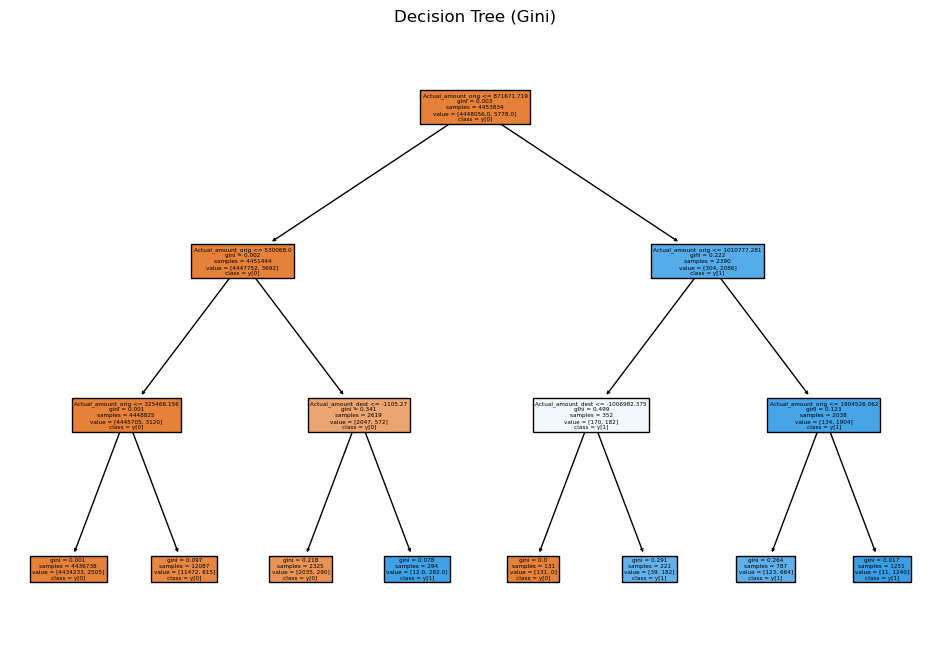

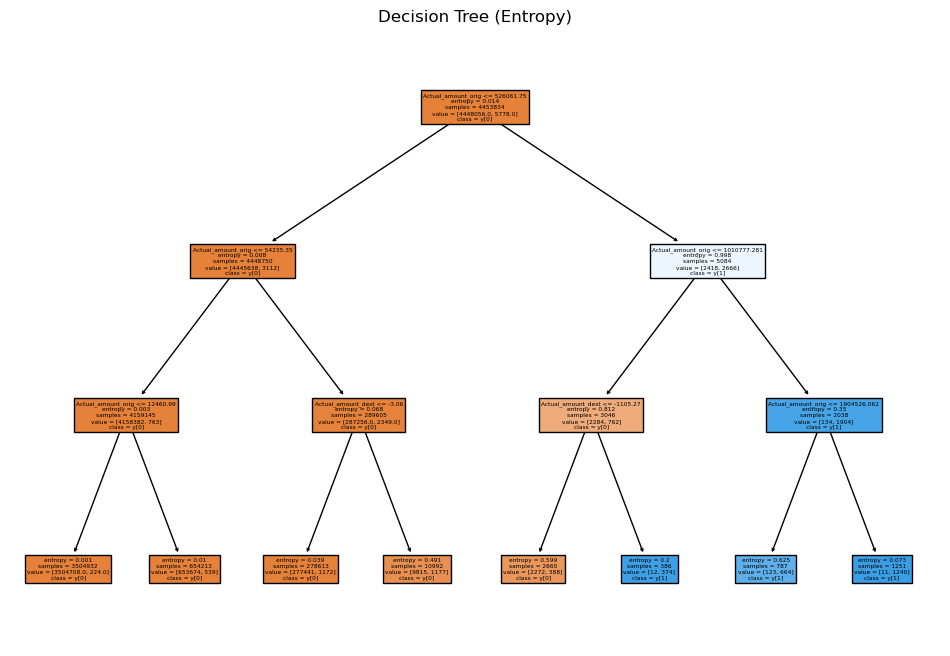

In [19]:
# Decision Tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Creating the classifier object with Gini criterion
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
# Performing training
clf_gini.fit(X_train, Y_train)

# Decision tree with entropy criterion
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
# Performing training
clf_entropy.fit(X_train, Y_train)

# Predictions using Gini model
y_pred_gini = clf_gini.predict(X_test)

# Predictions using Entropy model
y_pred_entropy = clf_entropy.predict(X_test)

# Visualizing the Decision Tree (Gini)
plt.figure(figsize=(12,8))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=True)
plt.title("Decision Tree (Gini)")
plt.show()

# Visualizing the Decision Tree (Entropy)
plt.figure(figsize=(12,8))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=True)
plt.title("Decision Tree (Entropy)")
plt.show()

# Model Training and Prediction: Two models are trained: one using the Gini impurity criterion and 
# the other using the Entropy criterion and predictions are made using both models.
# Model Evaluation: Both models are evaluated using a confusion matrix, accuracy, and classification report.
# Visualization: The decision trees for both models are visualized using plot_tree from sklearn.tree.

In [20]:
# RANDOM FOREST
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize RandomForest Classifier
rf_classifier = RandomForestClassifier()
    
# Fit the classifier to the training data
rf_classifier.fit(X_train, Y_train)
   
# Make predictions
y_pred = rf_classifier.predict(X_test)


#### EVALUATION

In [22]:
def Evaluation_matix(y_pred,y_test):
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)
    
# Print scores of our classifiers
decision_tree_score = clf_gini.score(X_test, Y_test) * 100
print("Decision Tree Score(Gini Impurity): ", decision_tree_score)
decision_tree_score = clf_entropy.score(X_test, Y_test) * 100
print("Decision Tree Score(Entropy): ", decision_tree_score)
random_forest_score = rf_classifier.score(X_test, Y_test) * 100
print("Random Forest Score: ", random_forest_score)

# Evaluation of the Gini Model
print("Decision Tree: Gini Model Evaluation")
Evaluation_matix(y_pred_gini,Y_test)

# Evaluation of the Entropy Model
print("Decision Tree: Entropy Model Evaluation")
Evaluation_matix(y_pred_entropy,Y_test)

print('----------------------------------------------------------------')

# Evaluation of the Random Forest Model
print("Random Forest Classifier Model Evaluation:")
Evaluation_matix(y_pred,Y_test)

Decision Tree Score(Gini Impurity):  99.91958239425477
Decision Tree Score(Entropy):  99.9185869971804
Random Forest Score:  99.95856004811435
Decision Tree: Gini Model Evaluation
Accuracy: 0.9992
Confusion Matrix:
[[1906264      87]
 [   1448     987]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.92      0.41      0.56      2435

    accuracy                           1.00   1908786
   macro avg       0.96      0.70      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786

Decision Tree: Entropy Model Evaluation
Accuracy: 0.9992
Confusion Matrix:
[[1906286      65]
 [   1489     946]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.94      0.39      0.55      2435

    accuracy                           1.00   1908786
   macro avg       0.97      0.69      0.

In [23]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree (Gini Impurity)")
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_gini).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree (Gini Impurity)
True Positives: 987
False Positives: 87
True Negatives: 1906264
False Negatives: 1448
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 1711
False Positives: 67
True Negatives: 1906284
False Negatives: 724


<br>TP(Decision Tree) << TP(Random Forest) - Random Forest is better here
<br>FP(Decision Tree) > FP(Random Forest) - Random Forest has an edge
<br>TN(Decision Tree) < TN(Random Forest) - Random Forest is better here too
<br>FN(Decision Tree) > FN(Random Forest)

<br> Here Random Forest looks good.

With Such a good precision and hence F1-Score, Random Forest comes out to be better as expected.

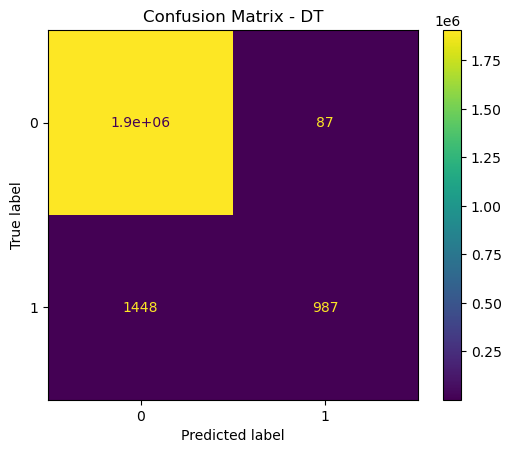

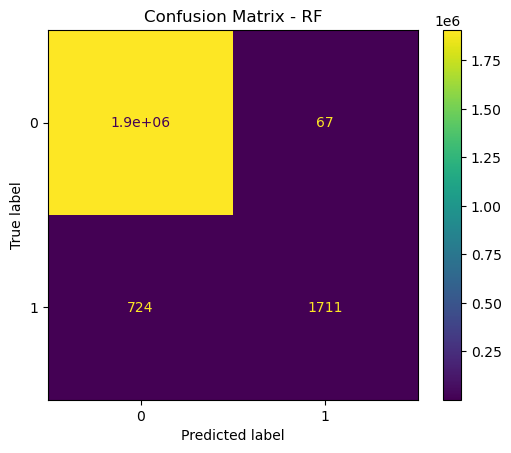

In [25]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, y_pred_gini))
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, y_pred))
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

In [ ]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_gini)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

THE AUC for both Decision Tree and Random Forest is equal, so both models are pretty good at what they do.

## CONCLUSION

<br>We have seen that Accuracy of both Random Forest and Decision Tree is equal, although teh precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.
<br>This is also one of the reason why Random Forest and Decision Tree are used unstead of other algorithms.

<br>Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.

<br>Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.

What are the key factors that predict fraudulent customer?
1. The source of request is secured or not ?
2. Is the name of organisation asking for money is legit or not ?
3. Transaction history of vendors.

What kind of prevention should be adopted while company update its infrastructure?
1. Use smart vertified apps only.
2. Browse through secured websites.
3. Use secured internet connections (USE VPN).
4. Keep your mobile and laptop security updated.
5. Don't respond to unsolicited calls/SMS(s/E-mails.
6. If you feel like you have been tricked or security compromised, contact your bank immidiately.

Assuming these actions have been implemented, how would you determine if they work?
1. Bank sending E-statements.
2. Customers keeping a check of their account activity.
4. Always keep a log of your payments.